# Relação entre partos com risco e condições da gestação 

## 1. Descrição da base de dados

O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

O Sistema de Informações sobre Nascidos Vivos ( SINASC ), foi implantado oficialmente a partir de 1990, com o objetivo de coletar dados sobre os nascimentos informados em todo território nacional e fornecer dados sobre natalidade para todos os níveis do Sistema de Saúde. Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). A base de dados é referente aos partos realizados no estado de Rondôdina (RO) em 2019. 

### 1.1 Objetivo
Organização da base para estudar a relação entre partos com risco para o bebê e algumas condições como tempo de gestação, consultas de pré-natal e peso do bebê. Por fim estipular apossibilidade de criar uma árvore de decisão para risco de asfixia de acordo com tais parâmetros.
Um dos parâmetros avaliados nesta base de dados é obtido por testes feitos logo após o nascimento. Durante o teste são avaliados alguns sinais apresentados pelo bebê, como a cor da pele e o número de batimentos cardíacos, que são pontuados conforme a escala de APGAR para dar um resultado final. Esta avaliação é feita logo após o nascimento (APGAR no primeiro minuto de vida) repetida 5 minutos depois (APGAR no quinto minuto de vida), onde, numa escala de 0 a 10, os valores mais próximos de 0 indicam risco para o bebê.
O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.


Explorado o dataframe é possível utilizar essas informações para gerar interpretações.


#### Descrição das colunas relevantes

| Coluna | Descrição     |  
|------------------|----------| 
| `IDADEMAE`      | Iadade da mãe    |   
| `ESTCIVMAE`      | Estado civil da mãe   |
| `LOCNASC`      | Local de ocorrência do nascimento conforme tabela*   |
| `ESCMAE`      | Escolaridade da mãe(anos) conforme tabela**   |
| `CONSULTAS`      | Número de consultas conforme tabela***   |
| `GESTACAO`      | Semanas de gestação conforme a tabela****  |
| `GRAVIDEZ`      | Tipo de gravidez conforme a tabela*****  |
| `PARTO`      | Tipo de parto conforme a tabela******  |
| `QTDFILVIVO`      | Número de filhos vivos  |
| `APGAR1`      | APGAR no primeiro minuto  |
| `APGAR5`      | APGAR no quinto minuto  |
| `PESO`      | peso do bebê  |
| `apgar5_risco`      | Se possui risco de asfixia  |
| `class_asfix`      | Grau da asfixia  |

### Legenda das tabelas:

*LOCNASC = Local de ocorrência do nascimento, conforme a tabela: 
9: Ignorado. 
1: Hospital. 
2: Outro Estab Saúde. 
3: Domicílio. 
4: Outros.

**ESCMAE = Escolaridade, anos de estudo concluídos: 
1: Nenhuma. 
2: 1 a 3 anos. 
3: 4 a 7 anos. 
4: 8 a 11 anos. 
5: 12 e mais. 
9: Ignorado.

***CONSULTAS = Número de consultas de pré-natal: 
1: Nenhuma.
2: de 1 a 3.

****GESTACAO = Semanas de gestação, conforme a tabela: 
9: Ignorado. 
1: Menos de 22 semanas.
2: 22 a 27 semanas.
3: 28 a 31 semanas.
4: 32 a 36 semanas.
5: 37 a 41 semanas. 
6: 42 semanas e mais.

***** GRAVIDEZ = Tipo de gravidez, conforme a tabela: 
9: Ignorado.
1: Única.
2: Dupla.
3: Tripla e mais.

****** PARTO = Tipo de parto, conforme a tabela: 
9: Ignorado. 
1: Vaginal. 
2: Cesáreo.

## 2. Importação das bibliotecas

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

## 3. Código download/carregamento/geração de dados

In [5]:

sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há dados duplicados

(27028, 69)


(27028, 69)

## 4. Exploração e tratamento dos dados

Nesta etapa iremos conhecer o dataframe de trabalho e fazer uma limpeza tratando dados ausentes.
Essa preparação é importante para gerar boas visualizações e iterpretações dos dados.

In [6]:
#verificando as primeiras linhas do DataFrame
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [11]:
#verificando as colunas presentes no DataFrame
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [12]:
#Verificando tipos dos dados por coluna e se há dados fantantes
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [13]:
# verificando os dados ausentes por variável:
sinasc.isna().any()


ORIGEM        False
CODESTAB       True
CODMUNNASC    False
LOCNASC       False
IDADEMAE      False
              ...  
munResUf      False
munResLat      True
munResLon      True
munResAlt      True
munResArea     True
Length: 69, dtype: bool

In [14]:
#Verificando a quantidade de dados ausentes por coluna
sinasc.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

In [15]:
# Recontando as colunas com valores faltanres que possuem algum interesse
sinasc.loc[:,['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',  'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']].isna().sum()


LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64

In [16]:
# Removendo os dados faltantes na coluna 'APGAR5'
sinasc = sinasc.dropna(subset=['APGAR5'])

In [17]:
#Verificando dados ausentes na coluna de interesse
sinasc['APGAR5'].isna().sum()

0

In [18]:
#verificando a nova quantidade de linhas e colunas após remoção
sinasc.shape

(26925, 69)

In [19]:
# 5) Substituindo valores não preenchidos pelo código 9:
sinasc['ESTCIVMAE'].fillna(9,inplace=True)


/tmp/ipykernel_33/1195118545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sinasc['ESTCIVMAE'].fillna(9,inplace=True)


In [20]:
# Verificando a nova proporção de dados ausentes
sinasc['ESTCIVMAE'].isna().sum()

0

In [21]:
#Verificando as linhas e colunas do dataframe
sinasc.shape

(26925, 69)

In [22]:
# 6) Substituindo valores ausentes de QTDFILVIVO por 0
sinasc['QTDFILVIVO'].fillna(0,inplace=True)
sinasc.shape

/tmp/ipykernel_33/3021517833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sinasc['QTDFILVIVO'].fillna(0,inplace=True)


(26925, 69)

In [23]:
# 7) Preenchendo os demais dados do dataframe
sinasc.loc[:,['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',   'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']].isna().sum()



LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO       0
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

In [24]:
#verificando valores ignorados('9') na sessão de CONSULTAS
sinasc['CONSULTAS'].value_counts()

CONSULTAS
4    18587
3     5957
2     1359
1      972
9       50
Name: count, dtype: int64

In [25]:
#Calculando a média de consultas para preenchimento de dados ignorados com a média.
sinasc['CONSULTAS'].mean()

3.5787929433611887

In [26]:
#Foi atribuído valores 9 (ignorado), pois nas colunas de 'escolaridade', 'tempo de gestação' e 'tipo de gravidez' 
# temos variáveis de intervalo e do tipo str, inviabilizando o preenchimento por média ou mediana. Foi atribuído uma média igual a 3
# para a coluna de consultas
sinasc['CONSULTAS'].fillna(3,inplace=True)
sinasc['ESCMAE'].fillna(9,inplace=True)
sinasc['GESTACAO'].fillna(9,inplace=True)
sinasc['GRAVIDEZ'].fillna(9,inplace=True)

/tmp/ipykernel_33/3196561214.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sinasc['CONSULTAS'].fillna(3,inplace=True)
/tmp/ipykernel_33/3196561214.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [27]:
sinasc.loc[:,['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',   'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']].isna().sum()

LOCNASC       0
IDADEMAE      0
ESTCIVMAE     0
ESCMAE        0
QTDFILVIVO    0
GESTACAO      0
GRAVIDEZ      0
CONSULTAS     0
APGAR5        0
dtype: int64

In [29]:
# 8) Gerando uma coluna com a classificação de axfixia de acordo com os parâmetros de APGAR
sinasc.loc[sinasc['APGAR5'] >= 8, 'class_asfix'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] >= 6 )& (sinasc['APGAR5'] < 8),
           'class_asfix'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >=4) & (sinasc['APGAR5'] < 6),
           'class_asfix'] = 'asfixia moderada'
sinasc.loc[sinasc['APGAR5'] < 4, 'class_asfix'] = 'asfixia severa'

In [30]:
#determinação da frequência
sinasc['class_asfix'].value_counts()

class_asfix
normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: count, dtype: int64

In [31]:
# 9) Renomeando as variáveis de acordo com sake case
sinasc.rename(columns={'ORIGEM':'origem', 'CODESTAB':'code_estab', 'CODMUNNASC':'code_mun_nasc', 'LOCNASC':'loc_nasc',
                       'IDADEMAE':'idade_mae', 'ESTCIVMAE':'estado_civ_mae','ESCMAE':'esc_mae', 'CODOCUPMAE':'cod_ocup_mae',
                       'QTDFILVIVO':'qtd_fil_vivo', 'QTDFILMORT':'qtd_fil_mort', 'CODMUNRES':'cod_mun_res','GESTACAO':'gestacao', 
                       'GRAVIDEZ':'gravidez', 'PARTO':'parto', 'CONSULTAS':'consultas', 'DTNASC':'data_nasc', 'HORANASC':'hora_nasc',
                       'SEXO':'sexo', 'APGAR1':'apgar1', 'APGAR5':'apgar5', 'RACACOR':'raca_cor', 'PESO':'peso', 'IDANOMAL':'id_anomalia',
                       'DTCADASTRO':'dt_cadastro','CODANOMAL':'cod_anomalia', 'NUMEROLOTE':'numero_lote', 'VERSAOSIST':'versao_sist',
                       'DTRECEBIM':'dt_recebim', 'DIFDATA':'dif_data','DTRECORIGA':'dt_rec_origa', 'NATURALMAE':'natural_mae', 'CODMUNNATU':'cod_mun_natu',
                       'CODUFNATU':'cod_uf_natu', 'ESCMAE2010':'esc_mae_2010','SERIESCMAE':'serie_esc_mae', 'DTNASCMAE':'dt_nasc_mae', 
                       'RACACORMAE':'raca_cor_mae', 'QTDGESTANT':'qtd_gest_ant', 'QTDPARTNOR':'qtd_part_nor','QTDPARTCES':'qtd_part_ces', 
                       'IDADEPAI':'idade_pai', 'DTULTMENST':'dt_ult_menst', 'SEMAGESTAC':'sema_gestac', 'TPMETESTIM':'tpmetestim',
                       'CONSPRENAT':'cons_prenat', 'MESPRENAT':'mes_prenat', 'TPAPRESENT':'tp_apresent', 'STTRABPART':'st_trab_part', 
                       'STCESPARTO':'st_ces_parto','TPNASCASSI':'tp_nasc_assi', 'TPFUNCRESP':'tp_func_resp', 'TPDOCRESP':'tp_doc_resp', 
                       'DTDECLARAC':'dt_declarac', 'ESCMAEAGR1':'esc_mae_agr1','STDNEPIDEM':'stdn_epidem', 'STDNNOVA':'stdn_nova', 'CODPAISRES':'cod_pais_res', 
                       'TPROBSON':'tp_robson', 'PARIDADE':'par_idade','KOTELCHUCK':'kotel_chuck', 'CONTADOR':'contador', 'munResStatus':'mun_res_status', 
                       'munResTipo':'mun_res_tipo', 'munResNome':'mun_res_nome','munResUf':'mun_res_uf', 'munResLat':'mun_res_lat',
                       'munResLon':'mun_res_lon', 'munResAlt':'mun_res_alt', 'munResArea':'mun_res_area'
                      }, 
              inplace=True)

In [32]:
#verificando as colunas
sinasc.columns

Index(['origem', 'code_estab', 'code_mun_nasc', 'loc_nasc', 'idade_mae',
       'estado_civ_mae', 'esc_mae', 'cod_ocup_mae', 'qtd_fil_vivo',
       'qtd_fil_mort', 'cod_mun_res', 'gestacao', 'gravidez', 'parto',
       'consultas', 'data_nasc', 'hora_nasc', 'sexo', 'apgar1', 'apgar5',
       'raca_cor', 'peso', 'id_anomalia', 'dt_cadastro', 'cod_anomalia',
       'numero_lote', 'versao_sist', 'dt_recebim', 'dif_data', 'dt_rec_origa',
       'natural_mae', 'cod_mun_natu', 'cod_uf_natu', 'esc_mae_2010',
       'serie_esc_mae', 'dt_nasc_mae', 'raca_cor_mae', 'qtd_gest_ant',
       'qtd_part_nor', 'qtd_part_ces', 'idade_pai', 'dt_ult_menst',
       'sema_gestac', 'tpmetestim', 'cons_prenat', 'mes_prenat', 'tp_apresent',
       'st_trab_part', 'st_ces_parto', 'tp_nasc_assi', 'tp_func_resp',
       'tp_doc_resp', 'dt_declarac', 'esc_mae_agr1', 'stdn_epidem',
       'stdn_nova', 'cod_pais_res', 'tp_robson', 'par_idade', 'kotel_chuck',
       'contador', 'mun_res_status', 'mun_res_tipo', 'mun_

In [35]:
#Salvando ova versão do dataframe em arquivo CSV
sinasc.to_csv('SINASC_RO_2019_nova_versao.csv')

OSError: [Errno 30] Read-only file system: '/kaggle/input/nascidos-vivos-ro/SINASC_RO_2019_nova_versao.csv'

## 5. Anáise e visualização dos dados

Nesta etapa iremos criar visualizações e gerar alguns insights sobre os dados obtidos.

In [36]:
#Carregando o novo arquivo gerado de acordo com a PEP8 (snake case - boas práticas)
rn_ro = pd.read_csv('SINASC_RO_2019_nova_versao.csv')

In [37]:
#Criando um novo DataFrame apenas com os dados de interesse
variaveis_grafico = pd.DataFrame(rn_ro[['apgar1', 'apgar5','sexo','gestacao','estado_civ_mae','consultas','idade_mae','peso']])

variaveis_grafico

,apgar1,apgar5,sexo,gestacao,estado_civ_mae,consultas,idade_mae,peso
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4,19,3685
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4,29,3055
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4,37,3460
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3,30,2982
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4,30,3310
...,...,...,...,...,...,...,...,...
26920,8.0,9.0,Masculino,32 a 36 semanas,2.0,4,32,2110
26921,8.0,9.0,Masculino,37 a 41 semanas,1.0,4,19,3310
26922,9.0,10.0,Masculino,37 a 41 semanas,2.0,4,24,3065
26923,8.0,9.0,Masculino,32 a 36 semanas,2.0,4,21,2352


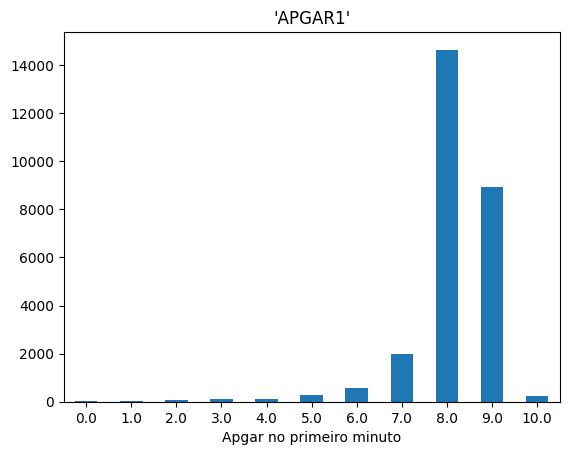

In [38]:
#gráfrico APGAR1
variaveis_grafico['apgar1'].value_counts().sort_index().plot.bar()
plt.title(label="'APGAR1'")
plt.xlabel(xlabel='Apgar no primeiro minuto')
plt.tick_params(axis='x', rotation=0)
plt.show()

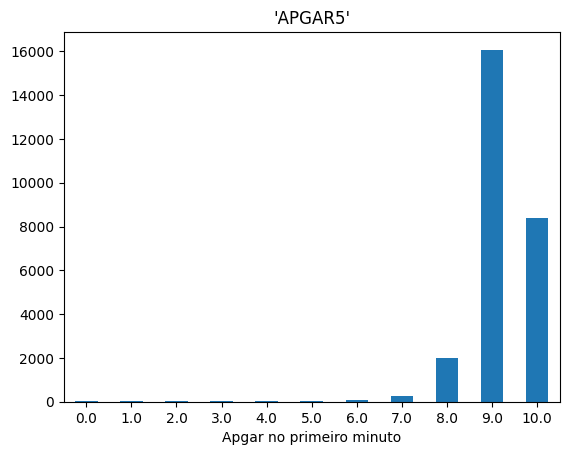

In [39]:
#gráfrico APGAR5
variaveis_grafico['apgar5'].value_counts().sort_index().plot.bar()
plt.title(label="'APGAR5'")
plt.xlabel(xlabel='Apgar no primeiro minuto')
plt.tick_params(axis='x', rotation=0)
plt.show()

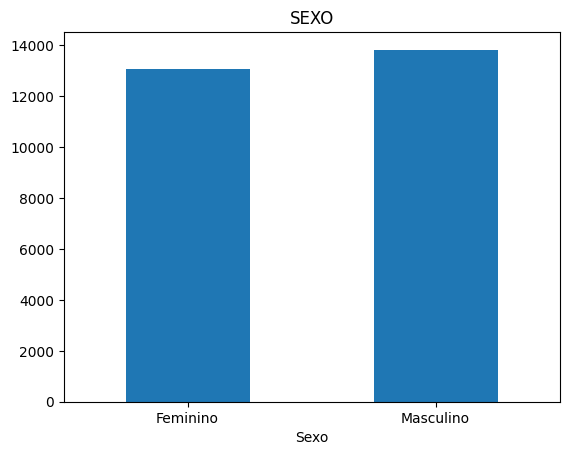

In [40]:
#gráfrico do sexo
variaveis_grafico['sexo'].value_counts().sort_index().plot.bar()
plt.title(label="SEXO")
plt.xlabel(xlabel='Sexo')
plt.tick_params(axis='x', rotation=0)
plt.show()

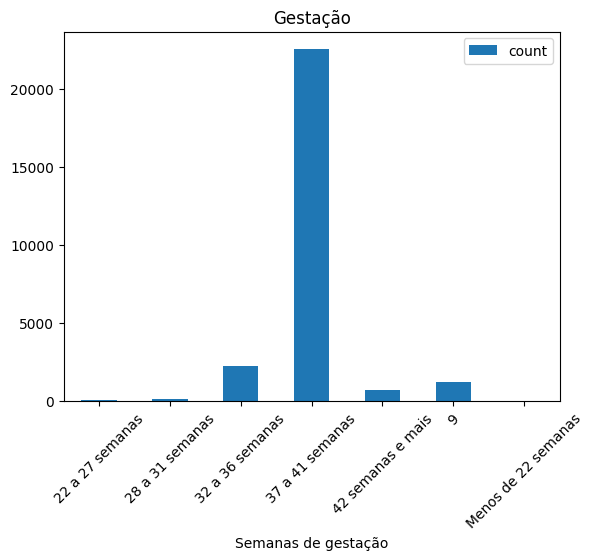

In [41]:
#gráfrico da gestação
variaveis_grafico['gestacao'].value_counts().sort_index().plot.bar()
plt.title(label="Gestação")
plt.xlabel(xlabel='Semanas de gestação')
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()

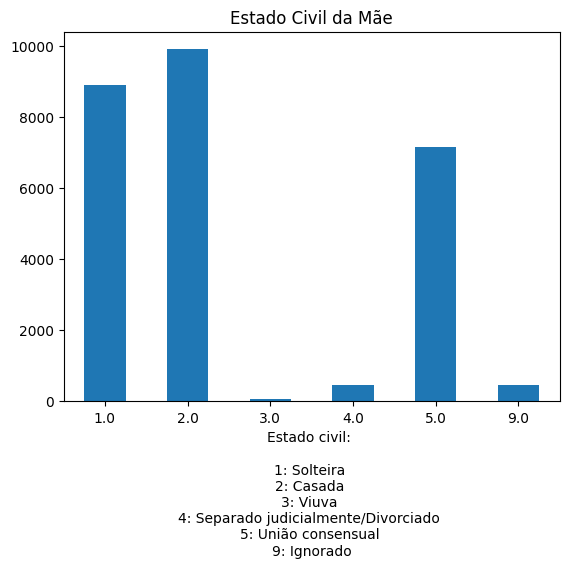

In [42]:
# gráfico de estado civil da mãe
variaveis_grafico['estado_civ_mae'].value_counts().sort_index().plot.bar()
plt.title(label="Estado Civil da Mãe")
plt.xlabel(xlabel='Estado civil: \n\n1: Solteira \n2: Casada \n3: Viuva \n4: Separado judicialmente/Divorciado \n5: União consensual \n9: Ignorado')
plt.tick_params(axis='x', rotation=0)
plt.show()

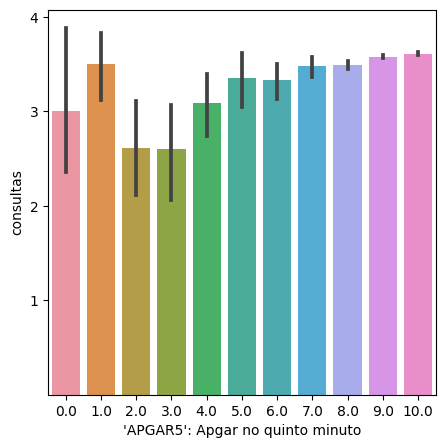

In [43]:
#gráfico de barras mostrando o APGAR5 médio por consultas
plt.rc('figure', figsize=(5, 5))
ax = sns.barplot(data=variaveis_grafico, 
                 x='apgar5', 
                 y='consultas')
ax.set_yticks(ticks=[1, 2, 3, 4])
plt.xlabel(xlabel="'APGAR5': Apgar no quinto minuto")

plt.show()

O baixo número de consultas de pré-natal tem relação com níveis mais baixos de APGAR5 de acordo com o gráfico

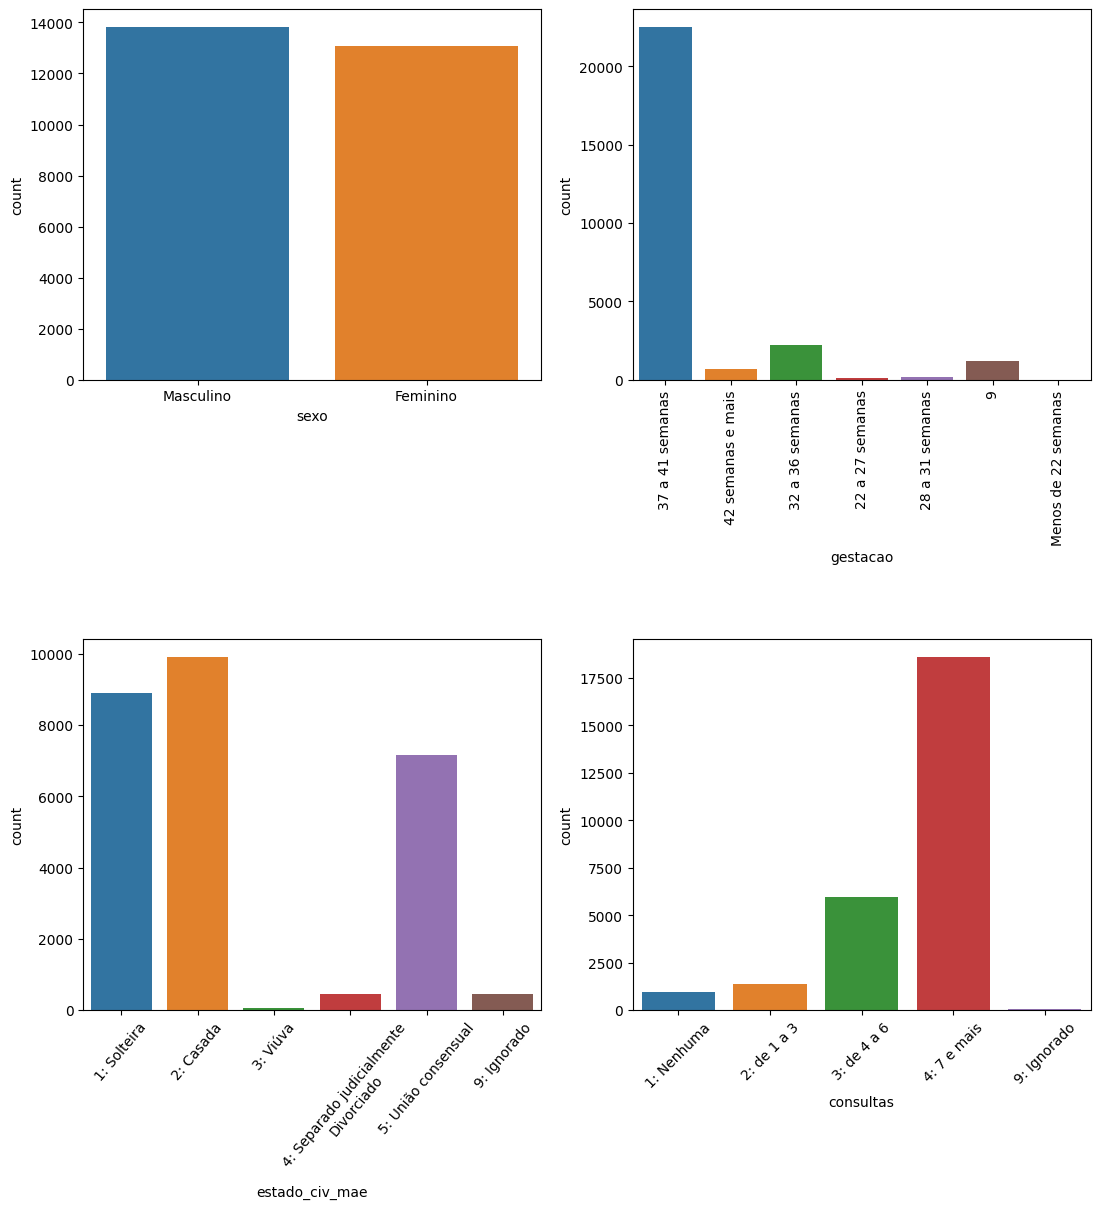

In [44]:
#painel com 4 gráficos mostrando as frequencias de sexo, gestação, estado civil da mãe e consultas de pré-natal
plt.close('all')
plt.rc('figure', figsize=(13, 13))
fig, axes = plt.subplots(2, 2)
axes[0,1].tick_params(axis="x", rotation=90)
fig.subplots_adjust(hspace=0.7)

ax1 = sns.countplot(ax = axes[0, 0], x='sexo', data=variaveis_grafico)
ax2 = sns.countplot(ax = axes[0, 1], x='gestacao', data=variaveis_grafico)
ax3 = sns.countplot(ax = axes[1, 0], x='estado_civ_mae', data=variaveis_grafico)
ax3.set_xticklabels(labels=['1: Solteira', 
                            '2: Casada', 
                            '3: Viúva', 
                            '4: Separado judicialmente\nDivorciado', 
                            '5: União consensual',
                            '9: Ignorado'], rotation = 50)
ax4 = sns.countplot(ax = axes[1, 1], x='consultas', data=variaveis_grafico)
ax4.set_xticklabels(labels=['1: Nenhuma', 
                            '2: de 1 a 3', 
                            '3: de 4 a 6', 
                            '4: 7 e mais', 
                            '9: Ignorado'],rotation = 45)

plt.show()

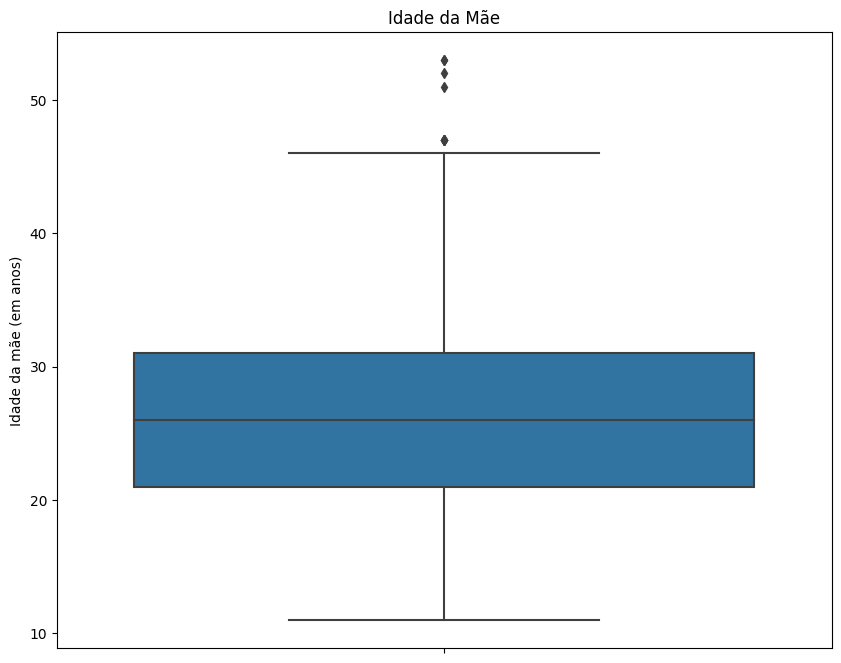

In [45]:
#gráfico boxplot com a idade da mãe
plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots(1,1)
sns.boxplot(y='idade_mae', data=variaveis_grafico, ax=axes)
axes.set_title(label='Idade da Mãe')
axes.set_ylabel(ylabel='Idade da mãe (em anos)')

plt.show()

O gráfico boxplot demonstra que as idades das mães se encontram geralmente entre 20 e 30 anos, com numero de mães considerável abaixo dos 20 anos.

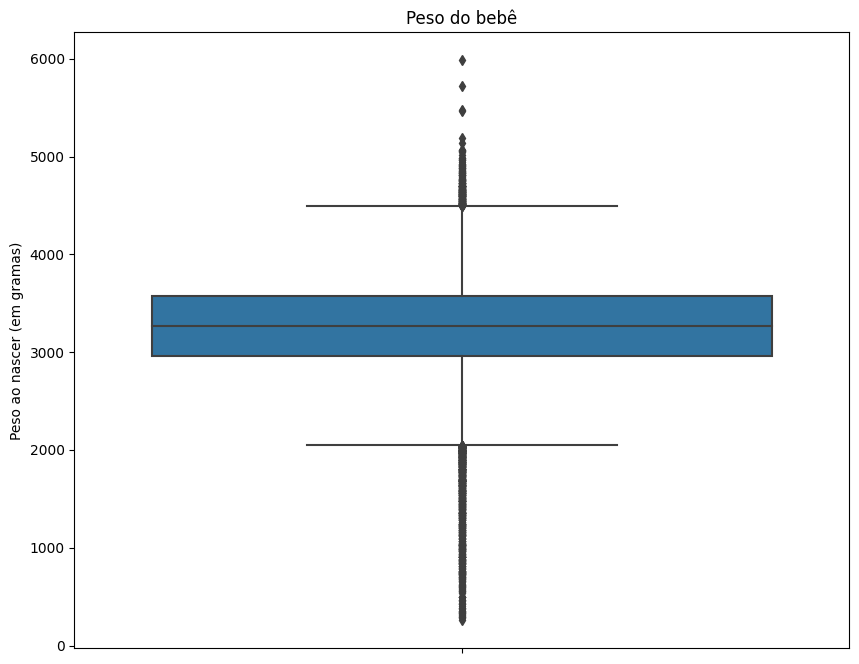

In [46]:
#gráfico boxplot com o peso do bebê
plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots(1,1)

sns.boxplot(y='peso', data=variaveis_grafico, ax=axes)
axes.set_title(label='Peso do bebê')
axes.set_ylabel(ylabel='Peso ao nascer (em gramas)')

plt.show()

O gráfico boxplot demonstra diversos valores discrepantes que podemos levar em consideração pricipalmente os pesos abaixo de 2500 g. O peso normal de um
rescém-nascido varia entre 2500g a 4500g.

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


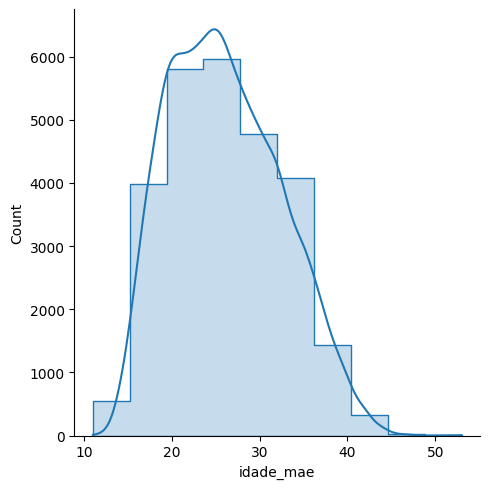

In [47]:
#histograma com a idade da mãe

sns.displot(data = variaveis_grafico['idade_mae'],alpha = .25,element = 'step',  kde = True, bins=10, ax=axes)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


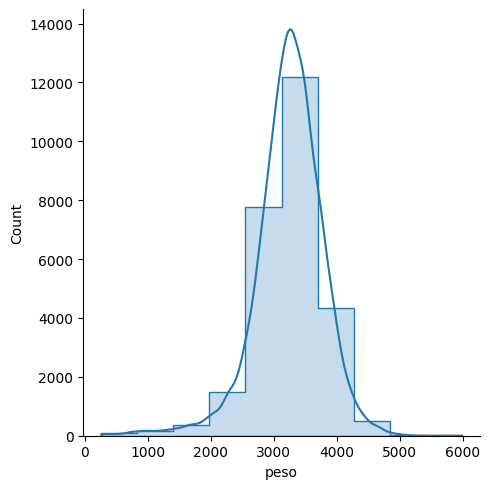

In [48]:
#histograma com o peso do bebê
sns.displot(data = variaveis_grafico['peso'],alpha = .25,element = 'step',  kde = True, bins=10, ax=axes)

plt.show()

In [49]:
#Checando a frequêcia de classificação de asfixia
rn_ro['class_asfix'].value_counts()

class_asfix
normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: count, dtype: int64

In [50]:
#Checando a frequência da cluna de gestação
rn_ro['gestacao'].value_counts()

gestacao
37 a 41 semanas        22523
32 a 36 semanas         2234
9                       1216
42 semanas e mais        698
28 a 31 semanas          162
22 a 27 semanas           85
Menos de 22 semanas        7
Name: count, dtype: int64

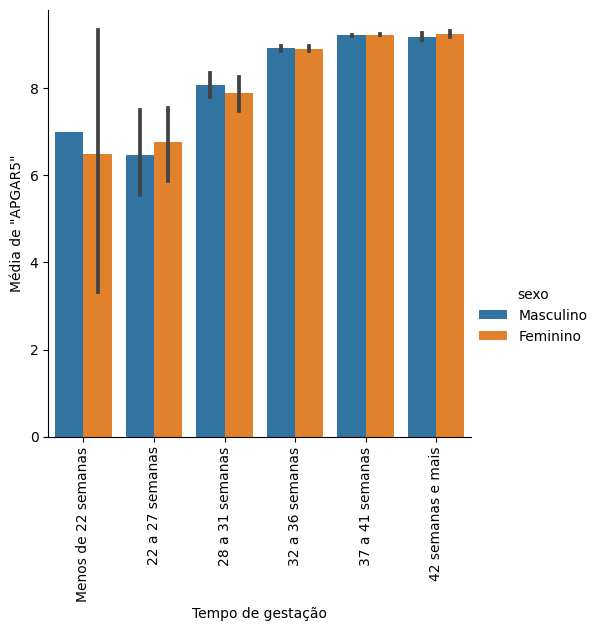

In [51]:
#Gráfico com a média de APGAR5 por semanas de gestação
sns.catplot(x='gestacao', 
            y='apgar5',
            hue='sexo', 
            data=rn_ro, 
            order=['Menos de 22 semanas', 
                   '22 a 27 semanas', 
                   '28 a 31 semanas', 
                   '32 a 36 semanas', 
                   '37 a 41 semanas', 
                   '42 semanas e mais'], 
            kind='bar')
plt.xticks(rotation=90)
plt.xlabel(xlabel='Tempo de gestação')
plt.ylabel(ylabel='Média de "APGAR5"')

plt.show()

É possível perceber aqui também, uma relação entre baixas semanas de gestção e valores baixos de APGAR5.

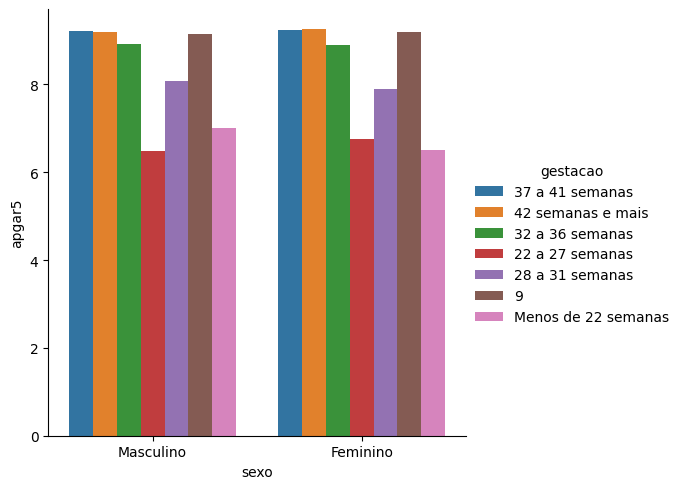

In [52]:
#Outra forma de visualizar os dados relacionando o APGAR5 às semanas de gestação
sns.catplot(x='sexo', y='apgar5',
            hue='gestacao',
            kind='bar',
            data=rn_ro,
            errorbar=None)
            

In [53]:
#tabela cruzada com APGAR5 nas colunas e gestação nas linhas
tabela_apgar5 = pd.crosstab(index=rn_ro['gestacao'], columns=rn_ro['class_asfix'])

tabela_apgar5 = tabela_apgar5.drop('9')

tabela_apgar5

class_asfix,asfixia leve,asfixia moderada,asfixia severa,normal
gestacao,,,,
22 a 27 semanas,12,1,21,51
28 a 31 semanas,18,12,3,129
32 a 36 semanas,73,19,8,2134
37 a 41 semanas,196,28,33,22266
42 semanas e mais,6,1,1,690
Menos de 22 semanas,1,0,2,4


In [54]:
#Somando os dados obtidos por variável de semanas de gestação
print(tabela_apgar5.sum(1))

gestacao
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64


In [55]:
#Percentuais de cada classe de gestação:
freq_tabela_apgar5  = tabela_apgar5.div(tabela_apgar5.sum(axis = 1), axis = 0)
print(freq_tabela_apgar5)

class_asfix          asfixia leve  asfixia moderada  asfixia severa    normal
gestacao                                                                     
22 a 27 semanas          0.141176          0.011765        0.247059  0.600000
28 a 31 semanas          0.111111          0.074074        0.018519  0.796296
32 a 36 semanas          0.032677          0.008505        0.003581  0.955237
37 a 41 semanas          0.008702          0.001243        0.001465  0.988589
42 semanas e mais        0.008596          0.001433        0.001433  0.988539
Menos de 22 semanas      0.142857          0.000000        0.285714  0.571429


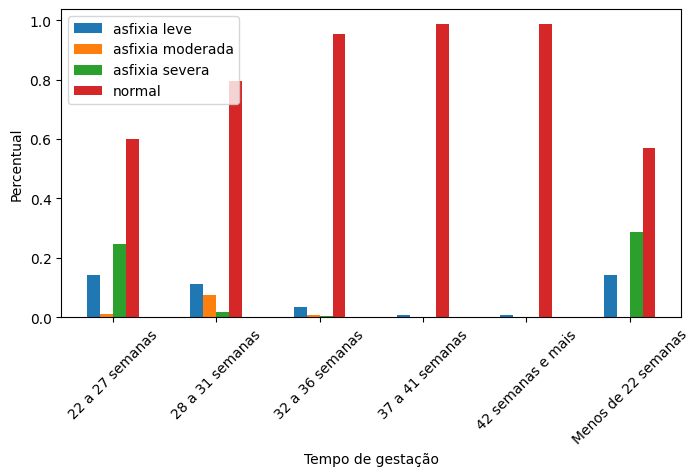

In [56]:
#Gráfico editado a partir dos dados percentuais acima
plt.rc('figure', figsize=(8,4))
freq_tabela_apgar5.plot.bar()
plt.xticks(rotation=45)
plt.xlabel(xlabel='Tempo de gestação')
plt.ylabel(ylabel='Percentual')
plt.legend(title='Apgar no quinto minuto',fontsize=5)
plt.legend(loc='upper left')

Os níveis de asfixia com relação às semanas de gestação apesar de percentuais baixos, temos que levar em consideração o tamanho da base e as variações.

Text(0.5, 1.0, 'Relação APGAR5 X Peso do bebê (barras)')

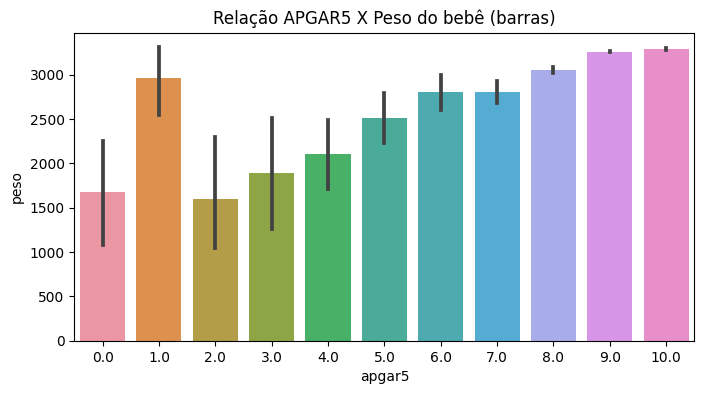

In [57]:
#Histograma de relação entre APGAR5 e peso do bebê
plt.rc('figure', figsize=(8,4))

ax1 = sns.barplot(x='apgar5', y='peso', data=rn_ro)
ax1.set_title(label='Relação APGAR5 X Peso do bebê (barras)')


Text(0.5, 1.0, 'Boxplot APGAR5 X Peso do bebê')

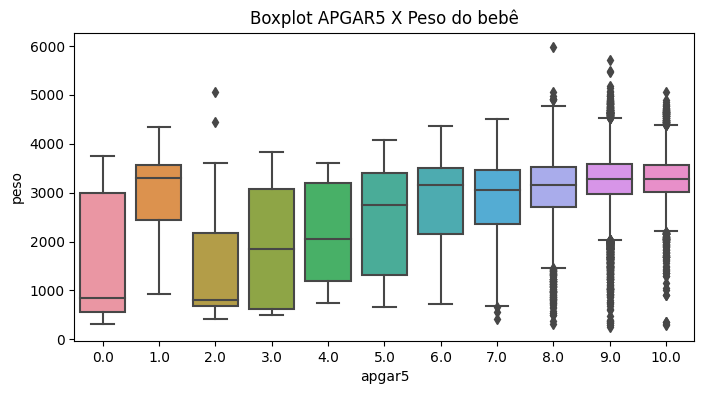

In [58]:
#Gráfico boxplot da relação entre APGAR5 e peso do bebê
ax2 = sns.boxplot(x='apgar5', y='peso', data=rn_ro)
ax2.set_title(label='Boxplot APGAR5 X Peso do bebê')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

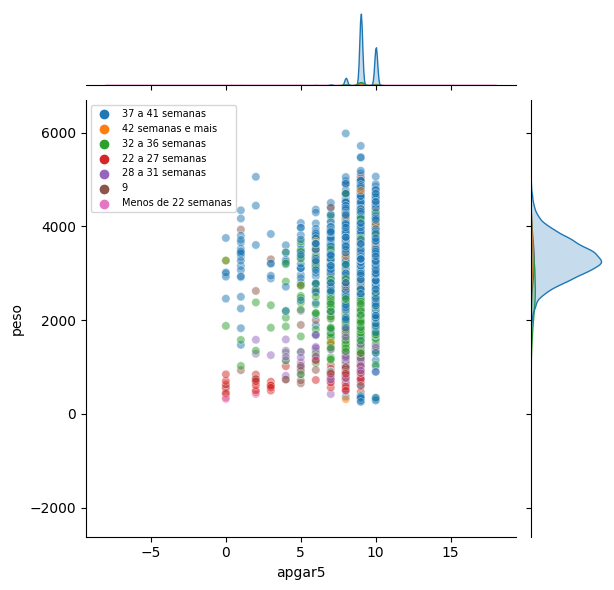

In [61]:
#Relação de APGAR5 , peso do bebê e semanas de gestação 
sns.jointplot(data=rn_ro, x='apgar5', y='peso',hue = 'gestacao',alpha = 0.5)
plt.legend(loc='best',fontsize=7)



## 
Ao observar as variáveis é possível perceber que existe relação entre o peso do bebê, APGAR5 e as semanas de gestação. Bebês com semanas de gestação menores apresentam pesos menores e valores de APGAR5 quase sempre inferiores a 10. Há também uma relação entre baixos pesos e semanas de gestação menores. Porém se o APGAR5 apresenta valores próximos a 10 também é possivel notar que o peso do bebê não tem tanta variação em relação aos valores mais baixos de APGAR5.

## 6. Modelo de Machine Learning

Nessa etapa iremos criar uma base de metadados para servir de estrutura para uma árvore de decisão. Esta árvore irá tentar prever se o rescém-nascido irá ter algum risco de asfixia com base nas semanas de gestação, quantidade de filhos vivos e peso do bebê.

In [93]:
#Carregando o DataFrame e tratando os dados faltantes e duplicados.
df = pd.read_csv('SINASC_RO_2019_nova_versao.csv')
df

,Unnamed: 0,origem,code_estab,code_mun_nasc,loc_nasc,idade_mae,estado_civ_mae,esc_mae,cod_ocup_mae,qtd_fil_vivo,...,contador,mun_res_status,mun_res_tipo,mun_res_nome,mun_res_uf,mun_res_lat,mun_res_lon,mun_res_alt,mun_res_area,class_asfix
0,0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26920,27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,...,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
26921,27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,...,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,normal
26922,27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,...,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal
26923,27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,...,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,normal


In [94]:
#Checando as lnhas duplicadas
print('Quantidade total de linhas: {}'.format(len(df)))
print('Número de linhas duplicadas: {}'.format(df.duplicated().sum()))

Quantidade total de linhas: 26925
Número de linhas duplicadas: 0


In [95]:
#Somando os dados faltantes
df.isna().sum()

Unnamed: 0        0
origem            0
code_estab       66
code_mun_nasc     0
loc_nasc          0
                 ..
mun_res_lat       1
mun_res_lon       1
mun_res_alt       1
mun_res_area      1
class_asfix       0
Length: 71, dtype: int64

In [96]:
#calculando o percentual de dados faltantes
percentage = (df.isnull().sum() / len(df)) * 100
percentage

Unnamed: 0       0.000000
origem           0.000000
code_estab       0.245125
code_mun_nasc    0.000000
loc_nasc         0.000000
                   ...   
mun_res_lat      0.003714
mun_res_lon      0.003714
mun_res_alt      0.003714
mun_res_area     0.003714
class_asfix      0.000000
Length: 71, dtype: float64

In [97]:
#Retirando todos os dados faltantes para a criação do modelo de machine learning
df_sem_na = df.dropna(axis=1)
df_sem_na.isna().sum()
df_sem_na.reset_index(drop=True, inplace=True)

In [98]:
#Verificando a quantidade de linhas e colunas após as remoções
df_sem_na.shape

(26925, 32)

In [99]:
#verificando o final do dataframe para avaliar a adequação da indexação após a remoção de dados ausentes.
df_sem_na.tail()

,Unnamed: 0,origem,code_mun_nasc,loc_nasc,idade_mae,estado_civ_mae,esc_mae,qtd_fil_vivo,cod_mun_res,gestacao,...,cod_pais_res,tp_robson,par_idade,kotel_chuck,contador,mun_res_status,mun_res_tipo,mun_res_nome,mun_res_uf,class_asfix
26920,27023,1,510340,1,32,2.0,12 anos ou mais,1.0,110030,32 a 36 semanas,...,1,7,1,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,normal
26921,27024,1,510675,1,19,1.0,8 a 11 anos,0.0,110092,37 a 41 semanas,...,1,1,0,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,normal
26922,27025,1,510787,1,24,2.0,8 a 11 anos,0.0,110030,37 a 41 semanas,...,1,3,1,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,normal
26923,27026,1,510787,1,21,2.0,8 a 11 anos,1.0,110030,32 a 36 semanas,...,1,10,1,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,normal
26924,27027,1,510792,1,18,5.0,8 a 11 anos,1.0,110050,37 a 41 semanas,...,1,7,1,5,2780269,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,normal


In [100]:
#Atribuido uma coluna para verificar Apgar5 e classificar nossa variável default
# 0 = Valores normais de APGAR. 
# 1 = Qualquer parâmetro fora do normal , sendo considerado como quadro de asfixia.

df_sem_na.loc[df_sem_na['class_asfix'] == 'normal', 'apgar5_risco'] = 0
df_sem_na.loc[df_sem_na['class_asfix'] != 'normal', 'apgar5_risco'] = 1

/tmp/ipykernel_33/3159471128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_na.loc[df_sem_na['class_asfix'] == 'normal', 'apgar5_risco'] = 0


In [101]:
#Verificando a frequencia dos valores de APGAR
df_sem_na['apgar5_risco'].value_counts()

apgar5_risco
0.0    26463
1.0      462
Name: count, dtype: int64

In [102]:
#Checando a frequência da coluna de quantidade de filhos
df_sem_na['qtd_fil_vivo'].value_counts()

qtd_fil_vivo
0.0     10871
1.0      9361
2.0      4454
3.0      1362
4.0       475
5.0       212
6.0       106
7.0        41
8.0        23
9.0         8
10.0        6
12.0        3
11.0        1
30.0        1
14.0        1
Name: count, dtype: int64

In [106]:
#Os dados de pessoas com mais de 8 filhos irão ampliar os branches da nossa árvore de forma desnecessária.
#Como são poucas linhas iremos removê-las.
df_limpo = df_sem_na[df_sem_na['qtd_fil_vivo'] <= 8]

In [107]:
df_limpo['qtd_fil_vivo'].value_counts()

qtd_fil_vivo
0.0    10871
1.0     9361
2.0     4454
3.0     1362
4.0      475
5.0      212
6.0      106
7.0       41
8.0       23
Name: count, dtype: int64

In [109]:
#Verificando as frequências de valores de gestação
df_limpo['gestacao'].value_counts()

gestacao
37 a 41 semanas        22509
32 a 36 semanas         2231
9                       1214
42 semanas e mais        697
28 a 31 semanas          162
22 a 27 semanas           85
Menos de 22 semanas        7
Name: count, dtype: int64

In [110]:
#Removendo os dados '9:não informados' da coluna de gestação
df_limpo = df_limpo[df_limpo['gestacao'] != '9']

In [116]:
#Verificando as frequências de valores de gravidez
df_limpo['gravidez'].value_counts()

gravidez
Única              25165
Dupla                461
Tríplice e mais        5
Name: count, dtype: int64

In [118]:
#Removendo os dados '9:não informados' da coluna de gravidez
df_limpo = df_limpo[df_limpo['gravidez'] != '9']

In [120]:
#Verificando as frequências de valores de consultas
df_limpo['consultas'].value_counts()

consultas
4    17942
3     5695
2     1267
1      686
9       41
Name: count, dtype: int64

In [121]:
#Removendo os dados '9:não informados' da coluna de consultas
df_limpo = df_limpo[df_limpo['consultas'] != 9]

In [123]:
#Separando as colunas, agora sem dados ausentes, em um novo dataframe para a árvore de decisão
df_arvore = df_limpo[['qtd_fil_vivo','peso','gestacao','gravidez','consultas','apgar5_risco']]
df_arvore.reset_index(drop=True, inplace=True)
df_arvore

,qtd_fil_vivo,peso,gestacao,gravidez,consultas,apgar5_risco
0,0.0,3685,37 a 41 semanas,Única,4,0.0
1,1.0,3055,37 a 41 semanas,Única,4,0.0
2,2.0,3460,37 a 41 semanas,Única,4,0.0
3,0.0,2982,37 a 41 semanas,Única,3,0.0
4,1.0,3310,37 a 41 semanas,Única,4,0.0
...,...,...,...,...,...,...
25585,1.0,2110,32 a 36 semanas,Única,4,0.0
25586,0.0,3310,37 a 41 semanas,Única,4,0.0
25587,0.0,3065,37 a 41 semanas,Única,4,0.0
25588,1.0,2352,32 a 36 semanas,Única,4,0.0


In [124]:
#Checando as variáveis alvo após as tratativas de dados
df_arvore['apgar5_risco'].value_counts()

apgar5_risco
0.0    25159
1.0      431
Name: count, dtype: int64

In [125]:
#transformando o dataframe em variáveis dummy
df_arvore = pd.get_dummies(df_arvore, columns=['qtd_fil_vivo','gravidez','gestacao','consultas',], drop_first=True)

In [126]:
#verificando as estrutras de dummies
df_arvore

,peso,apgar5_risco,qtd_fil_vivo_1.0,qtd_fil_vivo_2.0,qtd_fil_vivo_3.0,qtd_fil_vivo_4.0,qtd_fil_vivo_5.0,qtd_fil_vivo_6.0,qtd_fil_vivo_7.0,qtd_fil_vivo_8.0,gravidez_Tríplice e mais,gravidez_Única,gestacao_28 a 31 semanas,gestacao_32 a 36 semanas,gestacao_37 a 41 semanas,gestacao_42 semanas e mais,gestacao_Menos de 22 semanas,consultas_2,consultas_3,consultas_4
0,3685,0.0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
1,3055,0.0,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
2,3460,0.0,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
3,2982,0.0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
4,3310,0.0,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25585,2110,0.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True
25586,3310,0.0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
25587,3065,0.0,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True
25588,2352,0.0,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True


In [127]:
#Consulta das variáveis para criação da árvore de decisão
df_arvore.dtypes

peso                              int64
apgar5_risco                    float64
qtd_fil_vivo_1.0                   bool
qtd_fil_vivo_2.0                   bool
qtd_fil_vivo_3.0                   bool
qtd_fil_vivo_4.0                   bool
qtd_fil_vivo_5.0                   bool
qtd_fil_vivo_6.0                   bool
qtd_fil_vivo_7.0                   bool
qtd_fil_vivo_8.0                   bool
gravidez_Tríplice e mais           bool
gravidez_Única                     bool
gestacao_28 a 31 semanas           bool
gestacao_32 a 36 semanas           bool
gestacao_37 a 41 semanas           bool
gestacao_42 semanas e mais         bool
gestacao_Menos de 22 semanas       bool
consultas_2                        bool
consultas_3                        bool
consultas_4                        bool
dtype: object

In [128]:
#Como os dados devem ser do tipo float ou int, é preciso transformar alguns dados
df_arvore.apgar5_risco.astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
25585    0
25586    0
25587    0
25588    0
25589    0
Name: apgar5_risco, Length: 25590, dtype: int64

In [129]:
#Transformando a coluna apgar5_risco em tipo int
df_arvore.apgar5_risco = df_arvore.apgar5_risco.astype(int)

In [130]:
df_arvore.dtypes

peso                            int64
apgar5_risco                    int64
qtd_fil_vivo_1.0                 bool
qtd_fil_vivo_2.0                 bool
qtd_fil_vivo_3.0                 bool
qtd_fil_vivo_4.0                 bool
qtd_fil_vivo_5.0                 bool
qtd_fil_vivo_6.0                 bool
qtd_fil_vivo_7.0                 bool
qtd_fil_vivo_8.0                 bool
gravidez_Tríplice e mais         bool
gravidez_Única                   bool
gestacao_28 a 31 semanas         bool
gestacao_32 a 36 semanas         bool
gestacao_37 a 41 semanas         bool
gestacao_42 semanas e mais       bool
gestacao_Menos de 22 semanas     bool
consultas_2                      bool
consultas_3                      bool
consultas_4                      bool
dtype: object

In [134]:
#Separando as variáveis target
y = df_arvore.apgar5_risco
y

0        0
1        0
2        0
3        0
4        0
        ..
25585    0
25586    0
25587    0
25588    0
25589    0
Name: apgar5_risco, Length: 25590, dtype: int64

In [135]:
#Separando as variáveis explicativas
X = df_arvore.drop('apgar5_risco',axis=1)

In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25590 entries, 0 to 25589
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   peso                          25590 non-null  int64
 1   qtd_fil_vivo_1.0              25590 non-null  bool 
 2   qtd_fil_vivo_2.0              25590 non-null  bool 
 3   qtd_fil_vivo_3.0              25590 non-null  bool 
 4   qtd_fil_vivo_4.0              25590 non-null  bool 
 5   qtd_fil_vivo_5.0              25590 non-null  bool 
 6   qtd_fil_vivo_6.0              25590 non-null  bool 
 7   qtd_fil_vivo_7.0              25590 non-null  bool 
 8   qtd_fil_vivo_8.0              25590 non-null  bool 
 9   gravidez_Tríplice e mais      25590 non-null  bool 
 10  gravidez_Única                25590 non-null  bool 
 11  gestacao_28 a 31 semanas      25590 non-null  bool 
 12  gestacao_32 a 36 semanas      25590 non-null  bool 
 13  gestacao_37 a 41 semanas      2

In [137]:
# Separando a base em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=100)

In [139]:
#estruturas das bases de treino e teste 
print('Quantidade de linhas e colunas de X_train (70%):', 
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):', 
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):', 
      len(y_train))
print('Quantidade de linhas de y_test (30%):', 
      len(y_test))

Quantidade de linhas e colunas de X_train (70%): (17913, 19)
Quantidade de linhas e colunas de X_test (30%): (7677, 19) 

Quantidade de linhas de y_train (70%): 17913
Quantidade de linhas de y_test (30%): 7677


In [140]:
# Definindo um objeto com a função da árvore de decisão.
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [141]:
#Treinando o modelo com os dados já separados.
clf = clf.fit(X=X_train, 
              y=y_train)
clf

DecisionTreeClassifier(random_state=100)

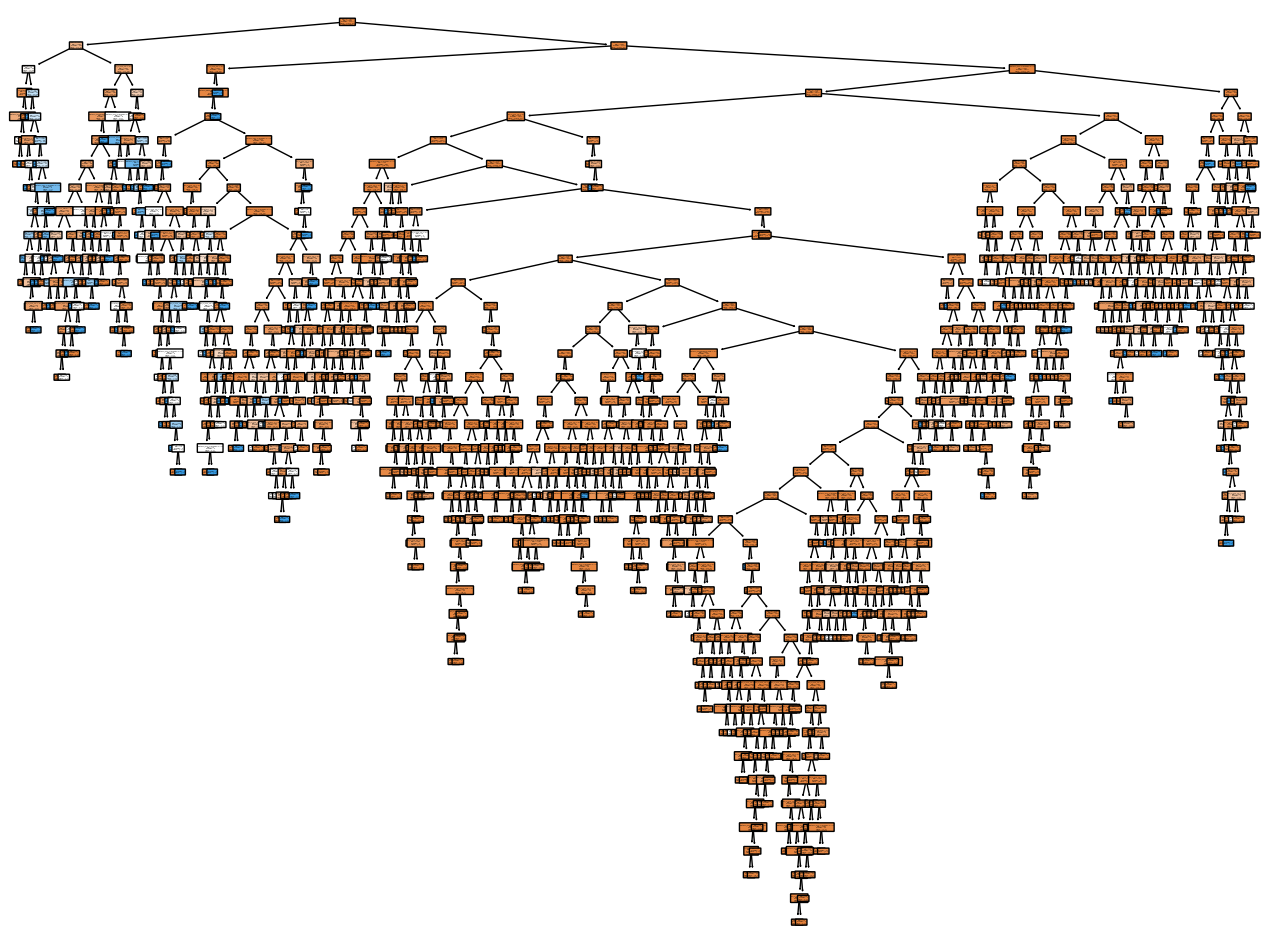

In [142]:
#Visualizando a árvore de decisão
plt.figure(figsize=(16,12))
plot_tree(decision_tree=clf,
          feature_names=X_train.columns,
          class_names=['normal', 'risco'],
          filled=True, 
          rounded=True)

plt.show()

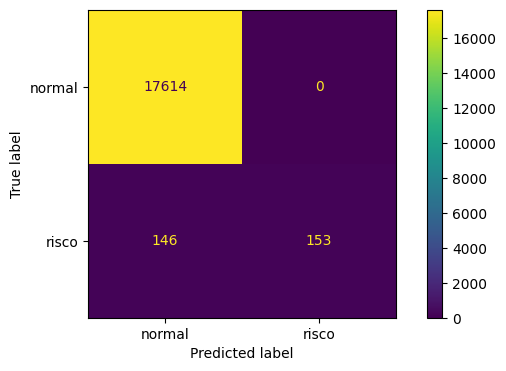

In [143]:
#Criando e visualizando a matriz de decisão da base de treino
y_pred = clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'risco'])

disp_train.plot()


In [144]:
# Calculando a acurácia na base de treinamento.

print('Acurácia:')
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train, 
               y_pred=predict_train)

Acurácia:


0.9918494947803271

In [146]:
#Avaliando os valores preditos obtidos com a base de treino
predict_test = clf.predict(X=X_test)

print('Valores preditos:') 
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
0    7594
1      83
Name: count, dtype: int64 

Valores reais:
apgar5_risco
0    7545
1     132
Name: count, dtype: int64


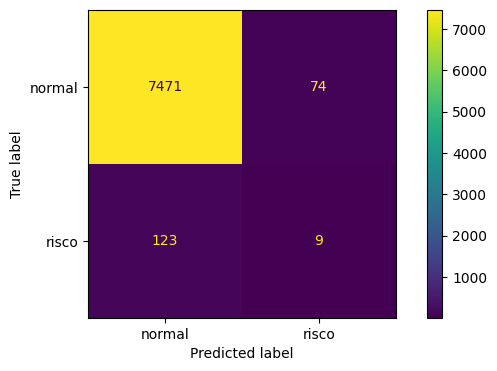

In [147]:
#  matriz de confusão para a base de teste.

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['normal', 'risco'])

plt.show()

In [148]:
# acurácia da base de teste. Comparando com a acurácia da base de treinamento.

print('Acurácia da base de teste:', 
      accuracy_score(y_true=y_test, 
                     y_pred=predict_test), '\n')

print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=y_train, 
                     y_pred=predict_train))

Acurácia da base de teste: 0.9743389344796144 

Acurácia da base de treinamento: 0.9918494947803271


In [151]:
# treinando uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
nova_clf = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train, 
                        y=y_train)

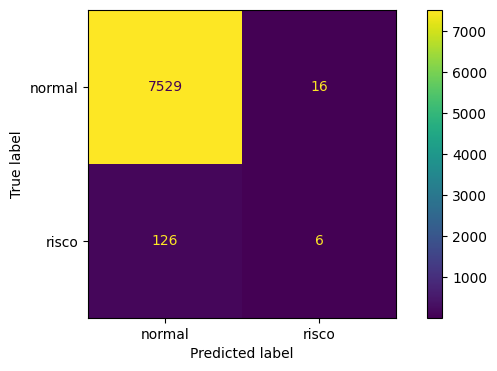

In [152]:
#Visualização da matriz de decisão da nova árvore:
ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['normal', 'risco'])

plt.show()

In [154]:
#Calculando a acurácia 
(7529+6) / (7529+16+126+6)


0.9815031913507881

O modelo gerado apresentou altos níveis de acurácia tanto para a base de treino como para a base de testes. Portando é possível aplicar esse modelo em dados futuros.